In [1]:
import lightgbm as lgb
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2"
df = pd.read_csv(
    filepath_or_buffer=data_url,
    sep=" ",
    header=1,
    skip_blank_lines=True,
    names=[
        "class_code",
        "largest_spot_size_code",
        "spot_distribution_code",
        "activity",
        "evolution",
        "prev_flare_24h",
        "historically_complex",
        "became_complex_on_this_pass",
        "area",
        "largest_spot_area",
        "c_class_flare_count",
        "m_class_flare_count",
        "x_class_flare_count"
    ]
)

for col in df.columns:
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].astype("category")

In [4]:
y = (df[["c_class_flare_count"]] > 0).astype("int").values.ravel()
feature_names = [c for c in df.columns if not c.endswith("flare_count")]
X = df[feature_names]

In [5]:
dtrain = lgb.Dataset(
    X,
    y,
    feature_name=feature_names,
    categorical_feature="auto",
    params={
        "min_data_in_bin": 5,
        "min_data_per_group": 1
    }
)
bst = lgb.train(
    params={
        'num_leaves': 7,
        'objective': 'binary',
        'min_data_in_leaf': 1,
        'verbose': 1
    },
    train_set=dtrain,
    num_boost_round=3
)

[LightGBM] [Info] Number of positive: 182, number of negative: 883
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 1065, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170892 -> initscore=-1.579319
[LightGBM] [Info] Start training from score -1.579319


  class_code largest_spot_size_code spot_distribution_code  activity  evolution  prev_flare_24h  historically_complex  became_complex_on_this_pass  area  largest_spot_area
0          D                      R                      O         1          3               1                     1                            2     1                  1
---
Index(['B', 'C', 'D', 'E', 'F', 'H'], dtype='object')
---


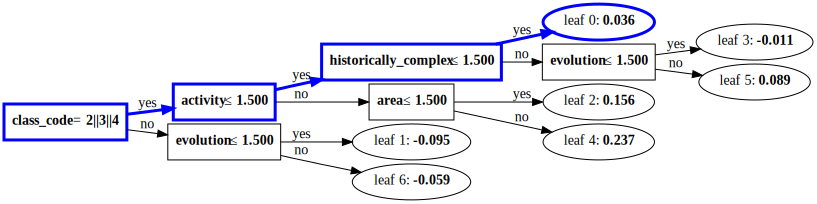

In [15]:
example_case = X[:1]
pd.set_option('display.width', 1000)
print(example_case)
print("---")
print(X["class_code"].cat.categories)
print("---")
lgb.create_tree_digraph(bst, example_case=example_case, tree_index=1)

In [ ]:
bst.trees_to_dataframe()

In [ ]:
df.head()